# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат


`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [1]:
import numpy as np
from scipy import stats

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

**Для всех последующих тестов примем уровеь значимости $\alpha=0.05$**


In [2]:
alpha = 0.05

**Mann-Whitney vs T-test**

**Исследование применимости статистичесих критериев в том числе при разных дисперсиях групп.**

http://mathpsy.com/wp-content/uploads/2014/01/Psiholog_Korneev.pdf

In [3]:
statistic, pvalue = stats.ttest_ind(A, B)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимое различие между пациентами принимающих препараты "A" и "B"')
else:
    print('Значимых различий между пациентами принимающих препараты "A" и "B" не наблюдается')

statistic=-1.733800647210997, pvalue=0.08451003973499756
Значимых различий между пациентами принимающих препараты "A" и "B" не наблюдается


In [4]:
statistic, pvalue = stats.mannwhitneyu(A, B)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимое различие между пациентами принимающих препараты "A" и "B"')
else:
    print('Значимых различий между пациентами принимающих препараты "A" и "B" не наблюдается')

statistic=4343.0, pvalue=0.054347680446611354
Значимых различий между пациентами принимающих препараты "A" и "B" не наблюдается


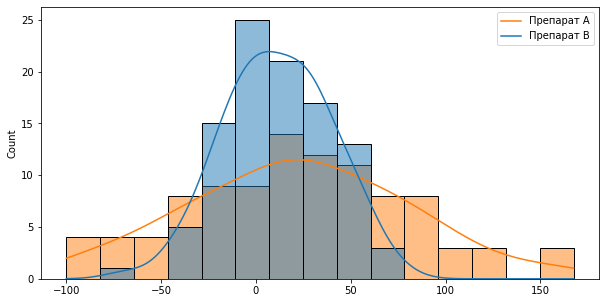

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot([A, B], kde=True)
plt.legend(['Препарат A', 'Препарат B'])

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат

`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [6]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [7]:
statistic, pvalue = stats.ttest_rel(A,B)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимые различие между группами "A" и "B"')
else:
    print('Значимых различий между группами "A" и "B" не наблюдается')

statistic=-2.1701703735210716, pvalue=0.03238579156467659
Существует статистически значимые различие между группами "A" и "B"


In [8]:
statistic, pvalue = stats.wilcoxon(A,B)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимые различие между группами "A" и "B"')
else:
    print('Значимых различий между группами "A" и "B" не наблюдается')

statistic=1930.0, pvalue=0.04077572901549266
Существует статистически значимые различие между группами "A" и "B"


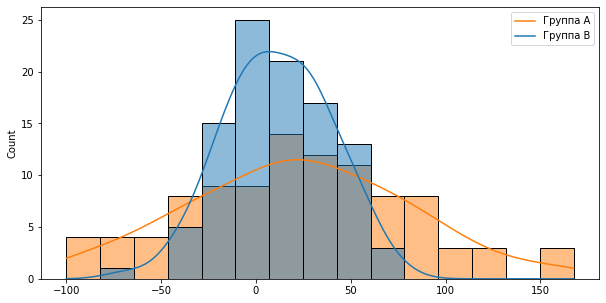

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot([A, B], kde=True)
plt.legend(['Группа A', 'Группа B'])

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`

`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [10]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

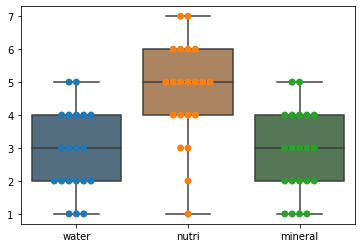

In [11]:
ax = sns.boxplot(data=[water, nutri, mineral], saturation=0.3)
ax.set_xticklabels(['water', 'nutri', 'mineral'])

ax1 = sns.swarmplot(data=[water, nutri, mineral], size=7)
ax1.set_xticklabels(['water', 'nutri', 'mineral']);

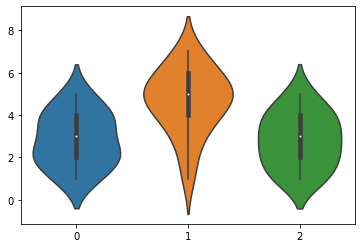

In [12]:
sns.violinplot(data=[water, nutri, mineral]);

In [13]:
statistic, pvalue = stats.f_oneway(water, nutri, mineral)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимое различие между группами')
else:
    print('Значимых различий между группами не наблюдается')

statistic=12.525963044834192, pvalue=2.9240047906326866e-05
Существует статистически значимое различие между группами


In [14]:
statistic, pvalue = stats.ttest_ind(water, mineral)
print(f'statistic={statistic}, pvalue={pvalue}')
if pvalue < alpha:
    print('Существует статистически значимое различие между поливом обычной и минеральной водой')
else:
    print('Значимых различий между поливом обычной и минеральной водой не наблюдается')

statistic=0.10129659201078253, pvalue=0.919834021847144
Значимых различий между поливом обычной и минеральной водой не наблюдается


Вероятность получить такие и более выраженные результаты случайно 92%

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<!-- ![](https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg) -->

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

Примем уровень значимости $alpha=0.05$

In [15]:
import pandas as pd
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.drop(columns='userid', inplace=True)
data.head()

,version,sum_gamerounds,retention_1,retention_7
0,gate_30,3,False,False
1,gate_30,38,True,False
2,gate_40,165,True,False
3,gate_40,1,False,False
4,gate_40,179,True,True


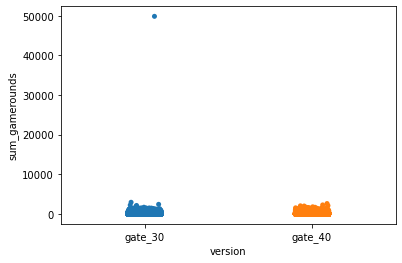

In [16]:
sns.stripplot(data=data, x='version', y='sum_gamerounds');

In [17]:
data.drop(index=data['sum_gamerounds'].idxmax(), inplace=True)

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

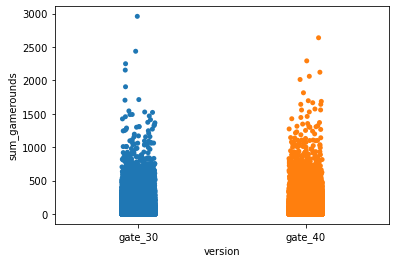

In [18]:
sns.stripplot(data=data, x='version', y='sum_gamerounds')

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

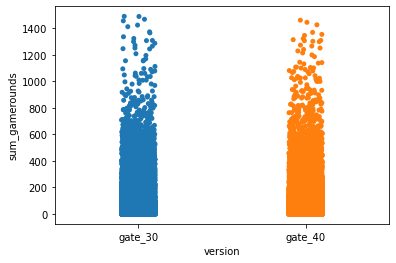

In [19]:
# Дополнительно сделаем хвосты короче
data = data[data['sum_gamerounds'] < 1500]
sns.stripplot(data=data, x='version', y='sum_gamerounds')

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [20]:
# групируем по версии, находим ,нормируем на количество пользователей в группе
data2 = data.groupby('version').sum() / data.groupby('version').count()
data2

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,50.912216,0.448074,0.190002
gate_40,50.710780,0.442099,0.181752


In [21]:
gate_30 = data[data['version'] == 'gate_30']
gate_40 = data[data['version'] == 'gate_40']

In [22]:
stats.mannwhitneyu(gate_30['sum_gamerounds'], gate_40['sum_gamerounds'])

MannwhitneyuResult(statistic=1008356648.5, pvalue=0.02380685235010494)

Учитывая знак статистики и p-value можно сказать следующее: 
> Получить такое или более экстремально различие в выборках можно с вероятностью ~2.4% и при уровне значимости в 5% мы можем принять альтернативную гипотезу о том, что пользователи, у которых ворота установлены на 30 уровне отличаются. Их средний уровень в игре выше.
<br>

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

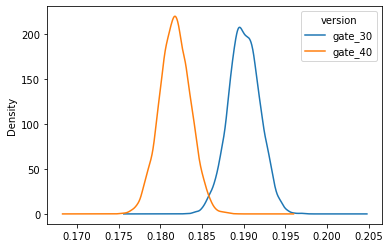

In [23]:
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(10000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [24]:
stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

Ttest_indResult(statistic=315.814545142013, pvalue=0.0)

Из графика видны явные различия между версиями в разрезе возвращения пользователя через 7 дней. Пользователи версии "30" заходят более вероятно в промежутке 7 дней.

График подкреплен тестом, который это доказывает

Повторно проведем бутстреп анализ но уже по пройденным уровням

In [25]:
# Creating an list with bootstrapped means for each AB-group
boot_2d = []
for i in range(10000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['sum_gamerounds'].mean()  #retention_1
    boot_2d.append(boot_mean)

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

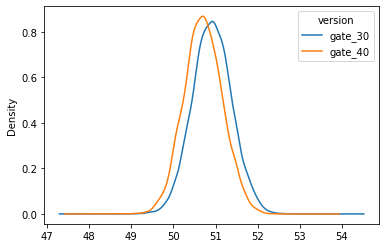

In [26]:
# Преобразование списка в DataFrame
boot_2d = pd.DataFrame(boot_2d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
plt.figure(figsize=(15, 10))
boot_2d.plot(kind='density')

In [27]:
stats.ttest_ind(boot_2d['gate_30'], boot_2d['gate_40'])

Ttest_indResult(statistic=32.409993319036445, pvalue=1.2513151203959426e-224)

`p-value < 0.05`
<br>
Что еще раз подтверждает наш первоначальный вывод о том, что существуют значимые различия между пользователями по пройденным уровням в группах 'gate_30' и 'gate_40'

**Ваши выводы?** 

Пользователи с версией игры, где ворота расположены на 40 уровне играют в игру через 7 дней после установки с меньшей вероятностью, чем пользователи у которых ворота были расположены на 30 уровне. Так же у пользователей с воротами на 30м средний уровень прохождения выше.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [28]:
import pandas as pd
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.


Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


***В данной задаче для всех заданий примем уровень значимости равный 0.05***

In [29]:
import seaborn as sns
attack_grass_pokemon = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock') |
                        (pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass')]['Attack']

attack_rock_pokemon = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass') |
                        (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock')]['Attack']

In [30]:
from scipy import stats
stats.ttest_ind(attack_grass_pokemon, attack_rock_pokemon)

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

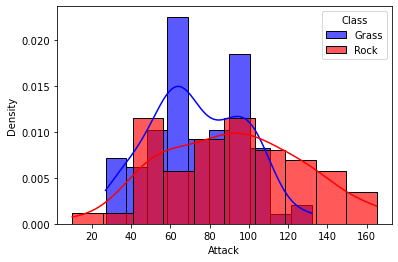

In [31]:
sns.histplot(data=attack_grass_pokemon, label='Grass', color='blue', alpha=0.65, bins=10, kde=True, stat='density')
sns.histplot(data=attack_rock_pokemon, label='Rock', color='red', alpha=0.65, bins=10, kde=True, stat='density')
plt.legend(title='Class')

p-value < $\alpha$ говорит нам о существенных различиях между атакой классов "Grass" и "Rock"

Знак статистики можно интерпритировать как средняя атака класса "Rock" больше класса "Grass".

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

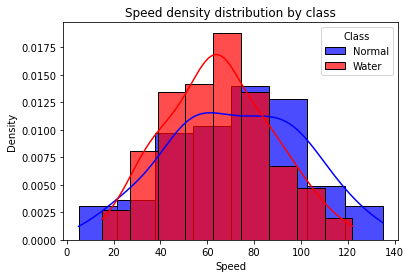

In [32]:
speed_water_pokemon = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal') |
                        (pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water')]['Speed']

speed_normal_pokemon = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water') |
                        (pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal')]['Speed']

import matplotlib.pyplot as plt
sns.histplot(data=speed_normal_pokemon, label='Normal', stat='density', color='b', alpha=0.7, kde=True)
sns.histplot(data=speed_water_pokemon, label='Water', stat='density', color='r', alpha=0.7, kde=True)
# plt.legend(['Water_speed', 'Normal_speed attack'])
plt.legend(title='Class')
plt.xlabel('Speed')
plt.title('Speed density distribution by class');

In [33]:
stats.ttest_ind(speed_water_pokemon, speed_normal_pokemon)

Ttest_indResult(statistic=-2.150913330007121, pvalue=0.03255353551391033)

>Скорость покемонов значимо различается в зависимости от его класса. Покемоны класса "Normal" быстрее, чем класса "Water".

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [34]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [35]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [36]:
stats.ttest_1samp(pokemon['Speed'], treathed['Speed'].mean())

Ttest_1sampResult(statistic=-74.67324937314746, pvalue=0.0)

In [37]:
stats.mannwhitneyu(pokemon['Speed'], treathed['Speed'])

MannwhitneyuResult(statistic=27.5, pvalue=0.0003434406962426653)

In [38]:
stats.ttest_ind(pokemon['Speed'], treathed['Speed'])

Ttest_indResult(statistic=-5.2763372799195425, pvalue=1.697269585494424e-07)

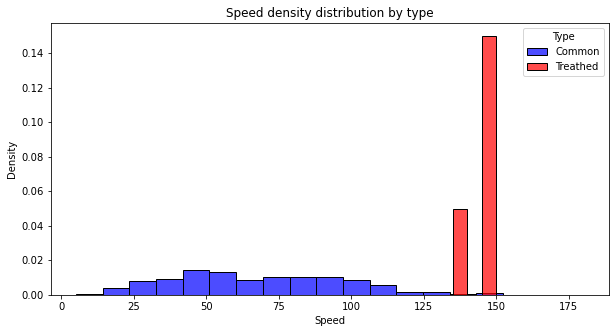

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(data=pokemon['Speed'], label='Common', stat='density', color='b', alpha=0.7)
sns.histplot(data=treathed['Speed'], label='Treathed', stat='density', color='r', alpha=0.7)
plt.legend(title='Type')
plt.xlabel('Speed')
plt.title('Speed density distribution by type');

Можем сделать вывод, что средняя скорость у покемонов, которые принимали сыворотку значительно выше 

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [40]:
gblegend = pokemon[['HP', 'Attack', 'Defense', 'Legendary']].groupby('Legendary') 
m = gblegend.sum() / gblegend.count()
m.T

Legendary,False,True
HP,67.182313,92.738462
Attack,75.669388,116.676923
Defense,71.559184,99.661538


In [41]:
pokemon_ = pokemon.copy().drop(columns=['Name', 'Class 1', 'Class 2', 'pid'])

In [42]:
pokemon_['Sum_Val'] = pokemon_['HP'] + pokemon_['Attack'] + pokemon_['Defense']
pokemon_['Product_Val'] = pokemon_['HP'] * pokemon_['Attack'] * pokemon_['Defense']

legend_pokemon = pokemon_[pokemon_['Legendary'] == True]
print(len(legend_pokemon))

65


In [43]:
common_pokemon = pokemon_[pokemon_['Legendary'] == False]
print(len(common_pokemon))

735


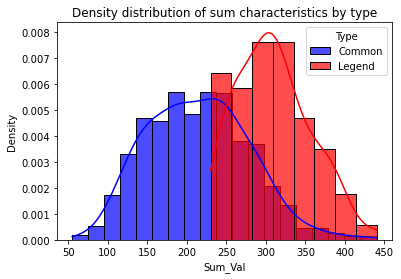

In [44]:
sns.histplot(data=common_pokemon['Sum_Val'], stat='density', color='b', alpha=0.7, kde=True, label='Common')
sns.histplot(data=legend_pokemon['Sum_Val'], stat='density', color='r', alpha=0.7, kde=True, label='Legend')
plt.title('Density distribution of sum characteristics by type')
plt.legend(title='Type')

In [45]:
stats.ttest_ind(common_pokemon['Sum_Val'], legend_pokemon['Sum_Val'])

Ttest_indResult(statistic=-11.591852366462316, pvalue=7.970942205722087e-29)

Сумма характеристик значимо различается, сумма характеристик легендарных покемонов выше, чем у обычных.

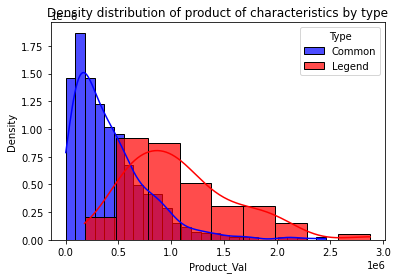

In [46]:
sns.histplot(data=common_pokemon['Product_Val'], stat='density', color='b', alpha=0.7, kde=True, label='Common')
sns.histplot(data=legend_pokemon['Product_Val'], stat='density', color='r', alpha=0.7, kde=True, label='Legend')
plt.title('Density distribution of product of characteristics by type')
plt.legend(title='Type')

In [47]:
stats.mannwhitneyu(common_pokemon['Product_Val'], legend_pokemon['Product_Val'])

MannwhitneyuResult(statistic=5741.5, pvalue=1.4775262883780305e-24)

Произведение характеристик значимо различается. Произведение характеристик легендарных покемонов в среднем выше, чем у обычных.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [48]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [49]:
x = {}
for pok_class in best_defence_class:
    x[pok_class] = pokemon[(pokemon['Class 1'] == pok_class) &
                           ~(pokemon['Class 2'].isin(best_defence_class)) |
                           ~(pokemon['Class 1'].isin(best_defence_class)) &
                           (pokemon['Class 2'] == pok_class)]['Defense']

In [50]:
stats.f_oneway(x['Rock'], x['Ground'], x['Steel'], x['Ice'])

F_onewayResult(statistic=8.820416931465497, pvalue=1.885892116821956e-05)

Данные группы статистически значимо различаются по уровню защиты

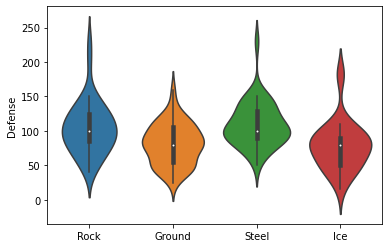

In [51]:
ax = sns.violinplot(data=[x['Rock'], x['Ground'], x['Steel'], x['Ice']])
ax.set_xticklabels(best_defence_class)
ax.set_ylabel('Defense');